In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv


# IMPORTING LIBRARIES

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

# LOADING DATASET

In [3]:
train = pd.read_csv("../input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv")
test = pd.read_csv("../input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv")

In [4]:
train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [5]:
test.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,...,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000
mean,11.247351,147.532627,150.445761,153.324317,155.663413,158.169688,160.790853,162.282766,163.649191,165.589515,...,138.546570,145.539598,150.744980,155.638873,158.893196,159.648494,158.162019,157.672755,156.664250,154.776771
std,7.446712,43.593144,41.867838,40.442728,39.354776,37.749637,36.090916,36.212636,35.885378,33.721876,...,64.501665,65.132370,65.760539,65.565147,65.200300,65.499368,66.493576,66.009690,67.202939,68.285148
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,122.000000,126.000000,130.000000,134.000000,137.000000,141.000000,144.000000,145.000000,147.000000,...,90.000000,95.000000,99.000000,105.000000,113.000000,113.750000,113.000000,115.000000,111.000000,106.750000
50%,11.000000,154.000000,157.000000,159.000000,161.000000,163.000000,165.000000,166.000000,168.000000,169.000000,...,137.000000,155.000000,168.000000,177.000000,181.000000,182.000000,181.000000,180.000000,180.000000,179.000000
75%,18.000000,178.000000,179.000000,181.000000,182.000000,184.000000,185.000000,186.000000,187.000000,187.000000,...,195.000000,200.000000,204.250000,207.000000,207.000000,208.000000,207.000000,205.000000,206.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [6]:
train.head(6)            

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255


In [7]:
labels = train['label'].values

unique_values = np.array(labels)
np.unique(unique_values)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

The spread of all labels across the testing dataset

<AxesSubplot:ylabel='count'>

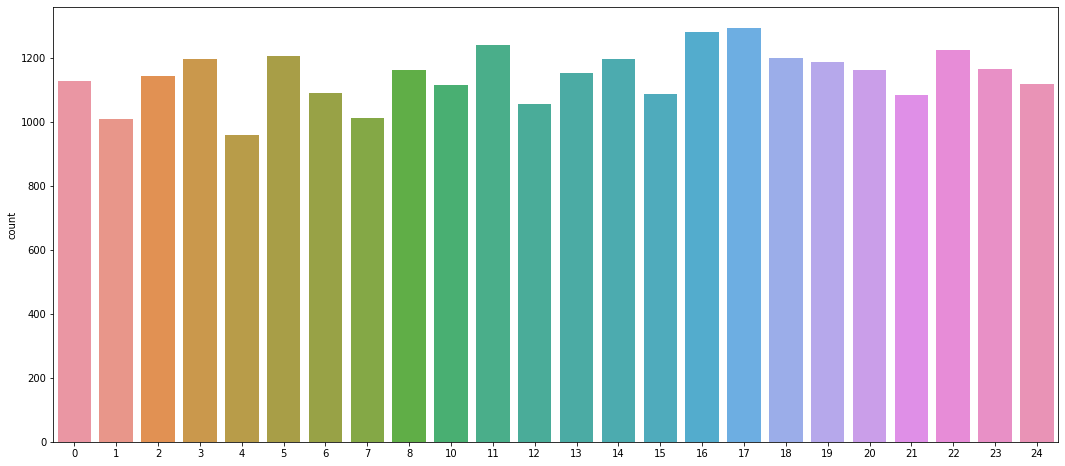

In [8]:
plt.figure(figsize = (18,8))
sns.countplot(x =labels)

# DATA PREPROCESSING AND ANALYSIS

The given MNIST dataset format is created to be as similar to the classic MNIST as possible. Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letters A-Z (and no cases for J = 9 or Z = 25 because of the necessity of gesture motions). The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST handwritten digit dataset but otherwise similar with a header row of label, pixel 1,pixel 2….pixel 784 which represent a single 28x28 pixel image with grayscale values between 0-255.

The train dataset consit of 1st column representing labels 0 to 24. The label is loaded in a seperate dataframe called 'train_label' and the 'label' column is dropped from the original training dataframe which now consist of only 784 pixel values for each image.

In [9]:
train_label=train['label']         # contains set of all label values in order
train_label.head()

0     3
1     6
2     2
3     2
4    13
Name: label, dtype: int64

In [10]:
trainset=train.drop(['label'],axis=1)
trainset.head()                         #contains set of all pixel values in order

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


Converting the dataframe to numpy array type to be used while training the CNN. The array is converted from 1-D to 3-D which is the required input to the first layer of the CNN. Similar preprocessing is done to the test dataframe.

In [11]:
x_train = trainset.values.reshape(-1,28,28,1)
print(x_train.shape)

(27455, 28, 28, 1)


Now, we must perform the same data preprocessing steps for the test dataset

In [12]:
test_label=test['label']
x_test=test.drop(['label'],axis=1)

print(x_test.shape)
x_test.head()

(7172, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


In [13]:
x_test=x_test.values.reshape(-1,28,28,1)

Now, we perform a grayscale min-max normalization to reduce the effect of illumination's differences. Moreover the CNN converges faster on [0..1] data than on [0..255] data.

In [14]:
x_train = x_train / 255
x_test = x_test / 255

### Converting the integer labels (0-24) to binary format

The label dataframe consist of single values from 1 to 24 for each individual picture. The CNN output layer will be of 24 nodes since it has 24 different labels as a multi label classifier. Hence each integer is encoded in a binary array of size 24 with the corresponding label being 1 and all other labels are 0. Such as if y=4 the the array is [0 0 0 1 0 0.....0]. The LabelBinarizer package from sklearn.preprocessing is used for that. 

In [15]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()

y_train=lb.fit_transform(train_label)
y_test=lb.fit_transform(test_label)

In [16]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(27455, 28, 28, 1) (27455, 24) (7172, 28, 28, 1) (7172, 24)


Preview of first 10 images after normalization.

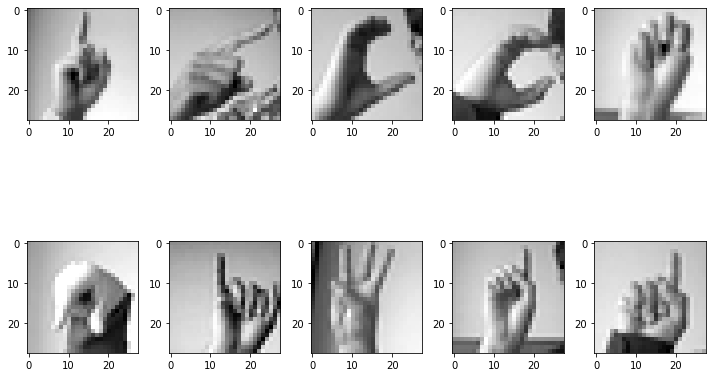

In [17]:
f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()  

# DATA AUGMENTATION

The performance of the DeepCNN model improves with the amount of given data; for this purpose, we applied the data augmentation technique to expand the size of training data from existing data artifcially. This is mainly done to avoid the overfitting problem. The input data need to be augmented, which involves augmenting the existing dataset with perturbed current images, including scaling and rotating. This is used to expose the neural network to a variety of variations. This way, the neural network is less likely to identify unwanted characteristics in the dataset.

A few augmentation techniques used are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, etc.
By applying just a couple of these transformations to our training data, we can easily double or triple the number of training examples and create a very robust model.

ImageDataGenerator package from keras.preprocessing.image allows to add different distortions to image dataset by providing random rotation, zoom in/out , height or width scaling etc to images pixel by pixel.

In [18]:
datagen = ImageDataGenerator(
        featurewise_center=False,                 # set input mean to 0 over the dataset
        samplewise_center=False,                  # set each sample mean to 0
        featurewise_std_normalization=False,      # divide inputs by std of the dataset
        samplewise_std_normalization=False,       # divide each input by its std
        zca_whitening=False,                      # apply ZCA whitening
        rotation_range=10,                        # randomly rotate images in the range (degrees, 0 to 180) - 1
        zoom_range = 0.1,                         # Randomly zoom image - 2
        width_shift_range=0.1,                    # randomly shift images horizontally (fraction of total width) - 3
        height_shift_range=0.1,                   # randomly shift images vertically (fraction of total height) - 4
        horizontal_flip=False,                    # randomly flip images -5
        vertical_flip=False)                      # randomly flip images - 6


datagen.fit(x_train)

We have randomly rotated some training images by 10 degrees (1), and some have been randomly zoomed by 10% (2). We have randomly shifted images horizontally by 10% of the width (3) and again randomly shifted images vertically by 10% of the height (4). We have not applied a vertical_flip (6) and horizontal_flip (5) since it may lead to misclassification.

# CONVOLUTIONAL NEURAL NETWORK (DeepCNN)

In [19]:
# Reducing learning rate
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [20]:
model = Sequential()

# convolution layer

# block 1
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
# block 2
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
# block 3
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

# fully connected layer

# flatten layer
model.add(Flatten())
# dense layer 1
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
# dense layer 2
model.add(Dense(units = 24 , activation = 'softmax'))

# compile model
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 75)        750       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 75)        300       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 50)        33800     
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 50)        200       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 50)          0

2022-05-17 18:30:08.580011: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [21]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 128) ,epochs = 20 , validation_data = (x_test, y_test) , callbacks = [learning_rate_reduction])

2022-05-17 18:30:09.426604: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
215/215 [==============================] - 51s 232ms/step - loss: 1.1040 - accuracy: 0.6529 - val_loss: 3.3647 - val_accuracy: 0.1115
Epoch 2/20
215/215 [==============================] - 49s 228ms/step - loss: 0.2270 - accuracy: 0.9241 - val_loss: 1.2151 - val_accuracy: 0.5931
Epoch 3/20
215/215 [==============================] - 50s 232ms/step - loss: 0.1061 - accuracy: 0.9662 - val_loss: 0.1366 - val_accuracy: 0.9544
Epoch 4/20
215/215 [==============================] - 48s 225ms/step - loss: 0.0672 - accuracy: 0.9783 - val_loss: 0.1311 - val_accuracy: 0.9509
Epoch 5/20
215/215 [==============================] - 48s 222ms/step - loss: 0.0459 - accuracy: 0.9850 - val_loss: 0.0099 - val_accuracy: 0.9996
Epoch 6/20
215/215 [==============================] - 49s 227ms/step - loss: 0.0353 - accuracy: 0.9886 - val_loss: 0.6280 - val_accuracy: 0.8154
Epoch 7/20
215/215 [==============================] - 50s 231ms/step - loss: 0.0338 - accuracy: 0.9889 - val_loss: 0.0722 - val_ac

In [22]:
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

225/225 [==============================] - 5s 20ms/step - loss: 7.0403e-04 - accuracy: 1.0000
Accuracy of the model is -  100.0 %


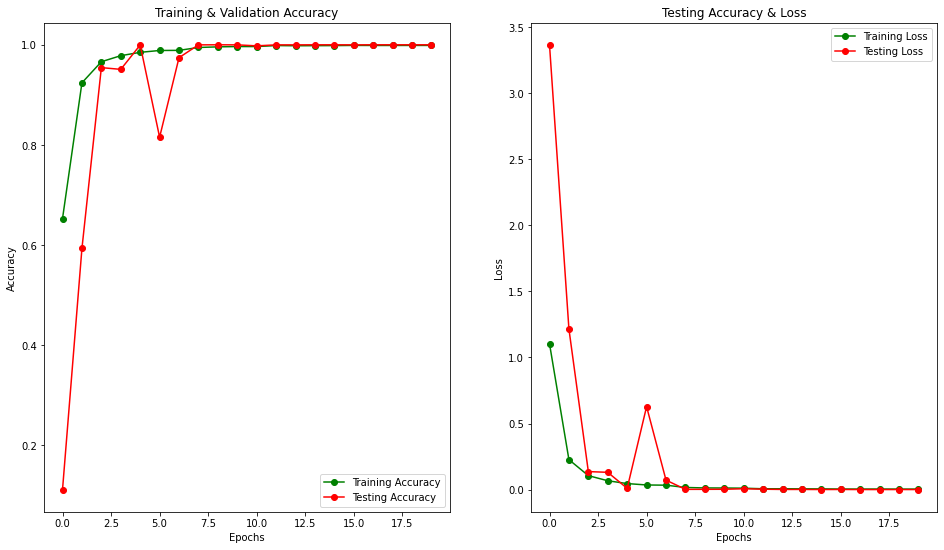

In [23]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()
